# Visualizing gradient descent in action

In [ ]:
import torch
import matplotlib.pyplot as plt

## Linear Regression Problem

In [ ]:
n = 100

In [ ]:
x = torch.ones(n, 2)
x[:,0].uniform_(-1., 1)
x[:5]

tensor([[ 0.8087,  1.0000],
        [-0.3346,  1.0000],
        [-0.7438,  1.0000],
        [ 0.2173,  1.0000],
        [ 0.9558,  1.0000]])

In [ ]:
w_y = torch.tensor([3., 2]); w_y

tensor([3., 2.])

In [ ]:
y = x@w_y + torch.rand(n)

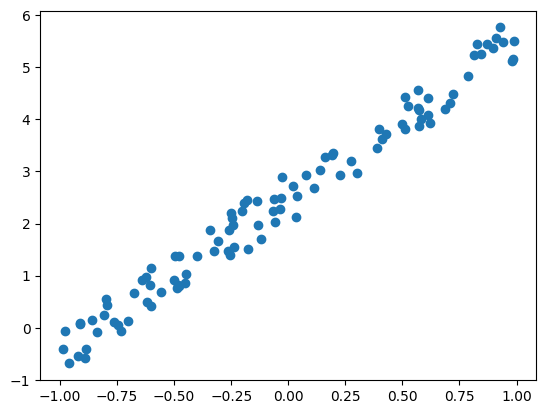

In [ ]:
plt.scatter(x[:,0], y);

In [ ]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

## Plot loss function

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loss_wrt_wgts(w1, w2):
    w = torch.Tensor([w1, w2])
    y_hat = x@w
    return mse(y_hat, y)
loss_wgts = np.vectorize(loss_wrt_wgts)

In [ ]:
w0_range = np.linspace(-20, 20, 50)
w1_range = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

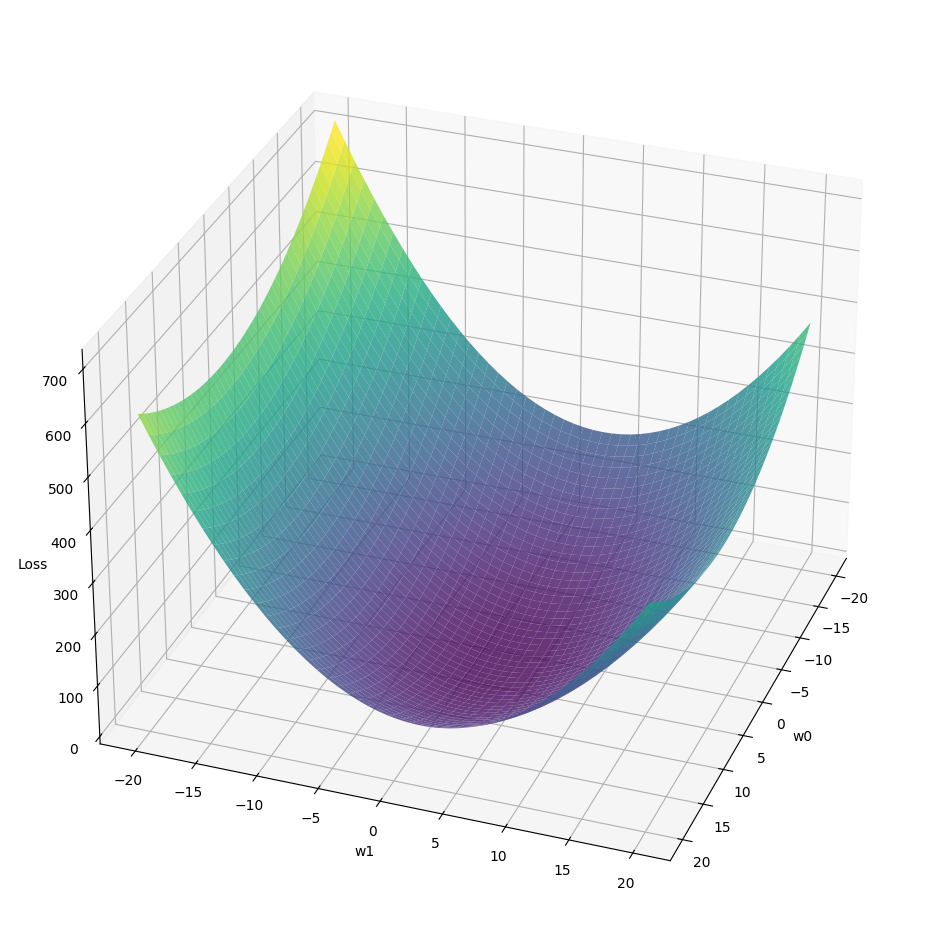

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax.set_xlabel('w0'); ax.set_ylabel('w1'); ax.set_zlabel('Loss')
ax.view_init(30, 20,0)

## Gradient descent

In [ ]:
def update(w):
    y_hat = x@w
    loss = mse(y, y_hat)
    prev_wgts = w.data.clone()
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()
    return prev_wgts, loss.item()

In [ ]:
def train(w0):
    recorder = []
    w = torch.tensor(w0, requires_grad=True)
    for t in range(n_epochs): recorder.append(update(w))
    rec_wgts, rec_loss = [list(o) for o in zip(*recorder)]
    rec_wgts = torch.stack(rec_wgts)
    return rec_wgts, rec_loss

In [ ]:
# hyper parameters
lr = 0.1
n_epochs = 100

# initial parameters (weights)
w0 = [-18., -18.]

rec_wgts, rec_loss = train(w0)

In [ ]:
print(rec_wgts[:10])
print(rec_loss[:10])

tensor([[-18.0000, -18.0000],
        [-16.7454, -14.0959],
        [-15.5403, -10.9606],
        [-14.3885,  -8.4410],
        [-13.2923,  -6.4142],
        [-12.2526,  -4.7824],
        [-11.2691,  -3.4671],
        [-10.3410,  -2.4054],
        [ -9.4669,  -1.5473],
        [ -8.6450,  -0.8524]])
[532.3306274414062, 379.4878845214844, 276.63824462890625, 206.41586303710938, 157.6349639892578, 123.0703125, 98.03730773925781, 79.48371887207031, 65.40799713134766, 54.48667907714844]


## Animate

In [ ]:
from matplotlib import animation
from matplotlib.gridspec import GridSpec
plt.rc('animation', html='html5')

In [ ]:
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# plot ground truth & model
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(x[:,0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# plot loss
ax1 = fig.add_subplot(gs[:,1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10,
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# plot weights & loss
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([],[], label='w0')
line3, = ax2.plot([],[], label='w1')
ax2.set_ylim(-20, 5)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([],[], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

ttl = fig.suptitle(f'lr: {lr} - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

def animate(i):
    line0.set_data(x[:,0].numpy(), (x@rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i+1,0].numpy(), rec_wgts[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_wgts[:i+1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'lr: {lr} - Epoch: {i+1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

## Visualizing different learning rates

In [ ]:
lr = 0.01
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [ ]:
lr = 0.7
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [ ]:
lr = 0.99
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [ ]:
lr = 1.01
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

## End!

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.gridspec import GridSpec

# Initialize data
n = 100
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
w_y = torch.tensor([3., 2])
y = x @ w_y + torch.rand(n)

# Define MSE loss
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

# Define loss with respect to weights
def loss_wrt_wgts(w1, w2):
    w = torch.Tensor([w1, w2])
    y_hat = x @ w
    return mse(y_hat, y)

# Vectorize the loss function
loss_wgts = np.vectorize(loss_wrt_wgts)

# Create a meshgrid for visualization
w0_range = np.linspace(-20, 20, 50)
w1_range = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

# Hyperparameters
lr = 0.1  # Learning rate
momentum = 0.9  # Momentum term
n_epochs = 100

# Initialize weights and momentum
w = torch.tensor([-21., -21.], requires_grad=True)
momentum_buffer = torch.zeros_like(w)

# Store weights and losses for visualization
rec_wgts = torch.zeros(n_epochs, 2)
rec_loss = torch.zeros(n_epochs)

In [ ]:
def update_momentum(w, momentum_buffer):
    y_hat = x @ w
    loss = mse(y, y_hat)
    prev_wgts = w.data.clone()
    loss.backward()

    with torch.no_grad():
        # Update momentum buffer
        momentum_buffer = momentum * momentum_buffer + lr * w.grad
        # Update weights
        w -= momentum_buffer
        w.grad.zero_()

    return prev_wgts, loss.item(), momentum_buffer


In [ ]:
# Animation setup
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# Plot ground truth & model
ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(x[:, 0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# Plot loss surface
ax1 = fig.add_subplot(gs[:, 1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10,
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# Plot weights & loss
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([], [], label='w0')
line3, = ax2.plot([], [], label='w1')
ax2.set_ylim(-20, 20)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([], [], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

ttl = fig.suptitle(f'lr: {lr} - Momentum: {momentum} - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

# Animation function
def animate(i):
    global w, momentum_buffer
    prev_wgts, loss, momentum_buffer = update_momentum(w, momentum_buffer)
    rec_wgts[i] = prev_wgts
    rec_loss[i] = loss

    line0.set_data(x[:, 0].numpy(), (x @ rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i + 1, 0].numpy(), rec_wgts[:i + 1, 1].numpy())
    line1.set_3d_properties(rec_loss[:i + 1])
    epochs = np.arange(i + 1)
    line2.set_data(epochs, rec_wgts[:i + 1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i + 1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i + 1])
    ttl.set_text(f'lr: {lr} - Momentum: {momentum} - Epoch: {i + 1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

# Create animation
anim = animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)
from IPython.display import HTML
HTML(anim.to_html5_video())

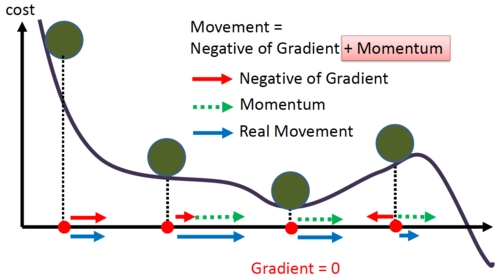

### **Momentum**
Traditional momentum optimization helps to accelerate gradient descent by considering the past gradients in the update rule. It does so by adding a fraction of the previous update vector to the current gradient, effectively building up velocity over time and allowing the optimizer to move faster through saddle points or flat regions in the loss landscape.

#### **1. Velocity Update**
$$
   \boldsymbol{\large v_t = \beta \cdot v_{t-1} + \eta \cdot \nabla J(\theta_t)}
$$
   - $v_t$ : Velocity at time step $t$ (the exponentially decaying average of past gradients). Also called **Momentum**
   - $\beta$ : Momentum coefficient (e.g., 0.9), controls how much of the past velocity is retained.
   - $\eta$ : Learning rate.
   - $\nabla J(\theta_t)$ : Gradient of the loss function at $\theta_t$.

#### **2. Parameter Update**
$$
   \boldsymbol{\large \theta_{t+1} = \theta_t - v_t}
   $$
   - $\theta_t$ : Current parameters.
   - $v_t$ : Velocity term.

In [ ]:
lr = 0.1
momentum=0.5
w = torch.tensor([-21., -21.], requires_grad=True)
momentum_buffer = torch.zeros_like(w)
anim = animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
def update_nesterov(w, momentum_buffer):
    # Lookahead position
    lookahead_w = w - momentum * momentum_buffer
    y_hat = x @ lookahead_w
    loss = mse(y, y_hat)
    loss.backward()

    with torch.no_grad():
        # Update momentum buffer
        momentum_buffer = momentum * momentum_buffer + lr * w.grad
        # Update weights
        w -= momentum_buffer
        w.grad.zero_()

    return w.data.clone(), loss.item(), momentum_buffer

In [ ]:
# Animation setup
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# Plot ground truth & model
ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(x[:, 0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# Plot loss surface
ax1 = fig.add_subplot(gs[:, 1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10,
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# Plot weights & loss
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([], [], label='w0')
line3, = ax2.plot([], [], label='w1')
ax2.set_ylim(-20, 20)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([], [], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

ttl = fig.suptitle(f'lr: {lr} - Momentum: {momentum} - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

# Animation function
def animate(i):
    global w, momentum_buffer
    prev_wgts, loss, momentum_buffer = update_nesterov(w, momentum_buffer)
    rec_wgts[i] = prev_wgts
    rec_loss[i] = loss

    line0.set_data(x[:, 0].numpy(), (x @ rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i + 1, 0].numpy(), rec_wgts[:i + 1, 1].numpy())
    line1.set_3d_properties(rec_loss[:i + 1])
    epochs = np.arange(i + 1)
    line2.set_data(epochs, rec_wgts[:i + 1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i + 1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i + 1])
    ttl.set_text(f'lr: {lr} - Nest. Momentum: {momentum} - Epoch: {i + 1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

# Create animation
anim = animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)
from IPython.display import HTML
HTML(anim.to_html5_video())

![image.png](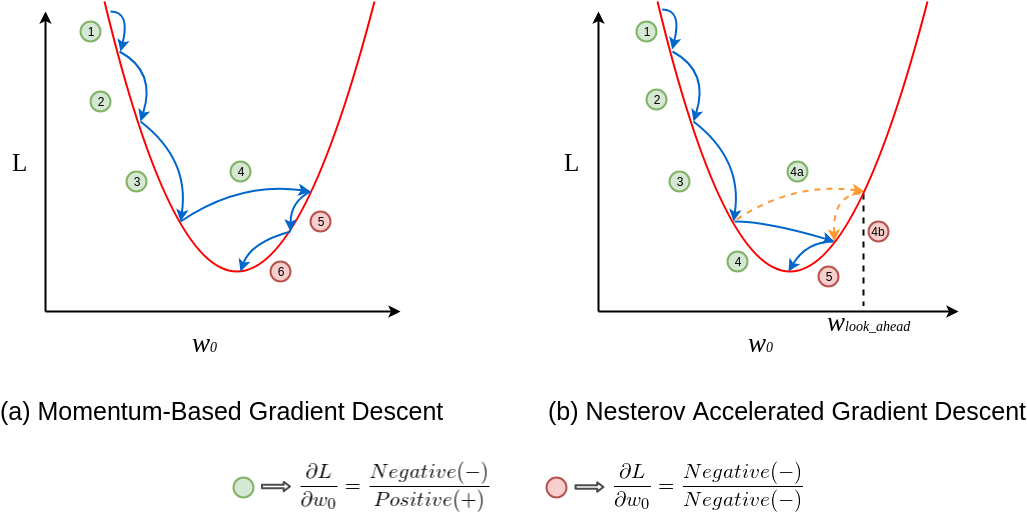
)

#### **Nesterov’s Momentum**
Nesterov’s Momentum improves upon this by making a subtle yet powerful change to the update rule. Instead of calculating the gradient at the current position, Nesterov’s Momentum calculates the gradient at a position slightly ahead in the direction of the accumulated momentum. This look-ahead step allows the optimizer to correct its course more responsively if it is heading towards a suboptimal direction.

1. **Look ahead point**:
   $$
   \boldsymbol{\large \theta_{\text{look_ahead}} = \theta_{t} - \beta \cdot v_{t-1}}
   $$
   - $\theta_{\text{look_ahead}}$ : point which is calculated through accumulated momentum
   - $\beta$ : Momentum coefficient (e.g., 0.9), controls how much of the past velocity is retained.
   - $\theta_t$ : Current parameters.
   - $v_{t-1}$ : accumulated momentum or velocity till previous point     

2. **Momentum update**
  $$
  \boldsymbol{\large v_t = \beta \cdot v_{t-1} + \eta \cdot \nabla J(\theta_{\text{look_ahead}})}
  $$

3. **Parameter Update**:
   $$
   \boldsymbol{\large \theta_{t+1} =  \theta_{t} - v_t}
   $$

   - $\theta_{t+1}$ : New parameters.
   - $v_t$ : updated momentum or velocity   
   - $\eta$ : Learning rate.
   - $\nabla J(\theta_{\text{look_ahead}})$ : Gradient of the loss function at $\theta_{\text{look_ahead}}$.




In [ ]:
lr = 0.1
momentum=0.5
w = torch.tensor([-21., -21.], requires_grad=True)
momentum_buffer = torch.zeros_like(w)
anim = animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)
from IPython.display import HTML
HTML(anim.to_html5_video())

## **Adagrad Gradient Descent**

Adagrad (Adaptive Gradient) is an optimization algorithm widely used in machine learning, especially for training deep neural networks. It adapts the learning rate for each parameter based on its historical gradients, making it well-suited for scenarios with sparse data or parameters requiring varying rates of convergence.

Adagrad automatically adjusts learning rates dynamically, providing higher rates for less frequent features and lower rates for more frequent ones. This property allows it to handle sparse features effectively, making it particularly useful in applications like Natural Language Processing (NLP) and recommendation systems.


### **Key Characteristics of Adagrad**

1. **Learning Rate Adaptation:**
   - Adagrad dynamically scales the learning rate for each parameter based on the magnitude of its past gradients. This eliminates the need for manually adjusting the learning rate for different parameters or across epochs.

2. **Sparse Feature Training:**
   - Sparse features, which typically have smaller gradients, are updated with larger effective learning rates. This ensures that such features can catch up in training compared to more frequently updated parameters.

3. **Escape from Saddle Points:**
   - Adagrad can escape saddle points more effectively compared to vanilla gradient descent or momentum-based methods. It achieves this by reducing updates in frequently updated directions while maintaining sufficient updates in less explored ones.


### **Adagrad Update Rule**

1. **Parameter Update Formula:**
   $$
   \boldsymbol{\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \nabla J(\theta_t)}
   $$

2. **Accumulated Squared Gradients:**
   $$
   \boldsymbol{G_t = G_{t-1} + (\nabla J(\theta_t))^2}
   $$

   - $G_t$: Accumulated squared gradients up to time step $t$.
   - $\eta$: Initial learning rate.
   - $\epsilon$: Small constant to prevent division by zero (e.g., $\epsilon = 1e-8$).
   - $\nabla J(\theta_t)$: Gradient of the loss function at parameters $\theta_t$.


### **Advantages of Adagrad**

1. **Dynamic Learning Rate Adjustment:**
   - Parameters with frequent updates (large accumulated gradient $G_t$) are adjusted with smaller learning rates.
   - Parameters with infrequent updates (small $G_t$) retain larger learning rates for significant updates.

2. **Sparse Data Handling:**
   - Well-suited for sparse data scenarios, such as one-hot encoding in NLP or recommendation systems.

3. **Improved Optimization in Non-convex Landscapes:**
   - Adagrad’s adaptive learning rates make it better at traversing challenging terrains like saddle points and plateaus.

4. **Reduced Manual Tuning:**
   - Since the learning rate is dynamically adjusted, the need for extensive manual hyperparameter tuning is reduced.


### **Limitations of Adagrad**

1. **Diminishing Learning Rates:**
   - Over time, $G_t$ grows larger due to the accumulation of squared gradients. This leads to excessively small effective learning rates, which can:
     - Slow down convergence.
     - Cause the model to stop learning prematurely.

2. **High Memory Requirements:**
   - Adagrad requires storing $G_t$, which scales with the number of parameters. For large models or datasets, this can lead to significant memory overhead.

3. **Not Adaptive to Later Stages of Training:**
   - Adagrad does not differentiate between the importance of past gradients and recent gradients, making it less adaptive during later training phases.



### **Enhancements to Adagrad**

1. **RMSProp:**
   - Addresses the diminishing learning rate issue by introducing an exponentially weighted moving average (EWMA) of past gradients instead of accumulating all gradients.
   - This allows the optimizer to focus on more recent gradients and maintain a stable learning rate.

2. **Adam Optimizer:**
   - Combines the strengths of RMSProp and Momentum by incorporating both EWMA of gradients and gradient momentum.





<img src = https://miro.medium.com/v2/resize:fit:720/format:webp/1*WRtvrr9Z0QcokiKlgU7xEw.gif>

In [ ]:
# Initialize data (unchanged)
n = 100
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
w_y = torch.tensor([3., 2])
y = x @ w_y + torch.rand(n)

# Define MSE loss
def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()

# Define loss with respect to weights
def loss_wrt_wgts(w1, w2):
    w = torch.Tensor([w1, w2])
    y_hat = x @ w
    return mse(y_hat, y)

# Vectorize the loss function
loss_wgts = np.vectorize(loss_wrt_wgts)

# Create a meshgrid for visualization
w0_range = np.linspace(-20, 20, 50)
w1_range = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

# Hyperparameters
lr = 2  # Base learning rate
n_epochs = 100

# Initialize weights and squared gradients accumulator
w = torch.tensor([-21., -21.], requires_grad=True)
grad_squared_accumulated = torch.zeros_like(w)

# Store weights and losses for visualization
rec_wgts = torch.zeros(n_epochs, 2)
rec_loss = torch.zeros(n_epochs)

def update_adagrad(w, grad_squared_accumulated):
    epsilon = 1e-8  # Small value to avoid division by zero
    y_hat = x @ w
    loss = mse(y, y_hat)
    prev_wgts = w.data.clone()
    loss.backward()

    with torch.no_grad():
        # Accumulate squared gradients
        grad_squared_accumulated += w.grad ** 2

        # Adjusted learning rate for each parameter
        adjusted_lr = lr / torch.sqrt(grad_squared_accumulated + epsilon)

        # Update weights
        w -= adjusted_lr * w.grad

        # Clear gradients for the next iteration
        w.grad.zero_()

    return prev_wgts, loss.item(), grad_squared_accumulated

# Animation setup (unchanged)
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# Plot ground truth & model
ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(x[:, 0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# Plot loss surface
ax1 = fig.add_subplot(gs[:, 1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10,
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# Plot weights & loss
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([], [], label='w0')
line3, = ax2.plot([], [], label='w1')
ax2.set_ylim(-20, 20)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([], [], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

ttl = fig.suptitle(f'lr: {lr} - Adagrad - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

# Animation function
def animate(i):
    global w, grad_squared_accumulated
    prev_wgts, loss, grad_squared_accumulated = update_adagrad(w, grad_squared_accumulated)
    rec_wgts[i] = prev_wgts
    rec_loss[i] = loss

    line0.set_data(x[:, 0].numpy(), (x @ rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i + 1, 0].numpy(), rec_wgts[:i + 1, 1].numpy())
    line1.set_3d_properties(rec_loss[:i + 1])
    epochs = np.arange(i + 1)
    line2.set_data(epochs, rec_wgts[:i + 1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i + 1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i + 1])
    ttl.set_text(f'lr: {lr} - Adagrad - Epoch: {i + 1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

# Create animation
anim = animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)
from IPython.display import HTML
HTML(anim.to_html5_video())


# RMSProp Gradient Descent

RMSProp (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to improve the efficiency and stability of training deep learning models. Introduced by Geoffrey Hinton, RMSProp addresses the limitations of earlier optimization methods such as Stochastic Gradient Descent (SGD) and AdaGrad. While SGD uses a fixed learning rate and AdaGrad excessively reduces the learning rate, RMSProp adapts learning rates for individual parameters by maintaining a moving average of squared gradients. This approach helps RMSProp handle challenges like non-stationary objectives and sparse gradients, making it a widely used algorithm in modern deep learning tasks.



## How RMSProp Works

RMSProp adjusts the learning rate for each parameter individually by keeping a moving average of squared gradients. This ensures that updates are appropriately scaled, preventing the learning rate from becoming too small (a drawback of AdaGrad) while maintaining stability.

The algorithm modifies the standard gradient descent update rule by incorporating the following steps:


### 1. Update the Moving Average of Squared Gradients
RMSProp maintains a decayed moving average of squared gradients:

$$
\boldsymbol{\large G_t = \beta\cdot G_{t-1} + (1 - \beta) (\nabla J(\theta_t)})^2
$$
where:
- $\beta$ is the decay rate (typically $\beta = 0.9$).
- $\nabla J(\theta_t)$ is the gradient of loss at $\theta_t$.

This moving average ensures that recent gradients have more influence than older gradients, addressing the problem of overly aggressive learning rate reduction in AdaGrad.


### 2. Update the Parameter
The parameter $\theta$ is updated using an adjusted learning rate:
$$
\boldsymbol{\large \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \nabla J(\theta_t)}
$$
where:
- $\eta$ is the learning rate (default $\eta = 0.001$).
- $\epsilon$ is a small constant (e.g., $\epsilon = 10^{-8}$) added for numerical stability.

The term $\sqrt{G_t + \epsilon}$ normalizes the gradient, preventing large updates in areas with steep gradients and ensuring stability.

## Key Features of RMSProp

### 1. **Decay Rate ($\gamma$)**
- Controls how quickly past gradients are "forgotten."
- A typical value is $\gamma = 0.9$, which balances the contributions of recent and past gradients.

### 2. **Learning Rate ($\eta$)**
- Determines the step size for parameter updates.
- RMSProp typically uses a default learning rate of $\eta = 0.001$, which can be tuned based on the task.

### 3. **Epsilon ($\epsilon$)**
- Prevents division by zero in the denominator of the parameter update equation.
- A small value such as $\epsilon = 10^{-8}$ ensures numerical stability.



## Advantages of RMSProp

1. **Efficient Convergence**: RMSProp adapts the learning rate dynamically, which helps in faster convergence for deep learning tasks.
2. **Handles Non-Stationary Objectives**: The moving average mechanism allows RMSProp to adapt to changing gradients effectively.
3. **Suitable for Sparse Gradients**: By normalizing gradients, RMSProp performs well in scenarios with sparse or inconsistent updates.



## Comparison with Other Optimizers

| Optimizer   | Key Feature                                   | Limitation                                  |
|-------------|----------------------------------------------|--------------------------------------------|
| **SGD**     | Constant learning rate                       | Struggles with sparse gradients and plateaus |
| **AdaGrad** | Learning rate adapts to gradient magnitudes  | Learning rate decreases too aggressively   |
| **RMSProp** | Decayed moving average of squared gradients  | Requires tuning of hyperparameters         |




<img src = https://miro.medium.com/v2/resize:fit:640/format:webp/1*_4zyVpZazh4OSIzprmYQEw.gif>

In [ ]:
# Hyperparameters for RMSProp
lr = 0.5  # Learning rate
gamma = 0.9  # Decay rate for squared gradients
epsilon = 1e-8  # To prevent division by zero

# Initialize weights and RMSProp cache
w = torch.tensor([-15., -15.], requires_grad=True)
grad_squared_accumulated = torch.zeros_like(w)

# Store weights and losses for visualization
rec_wgts = torch.zeros(n_epochs, 2)
rec_loss = torch.zeros(n_epochs)

def update_rmsprop(w, grad_squared_accumulated):
    y_hat = x @ w
    loss = mse(y, y_hat)
    prev_wgts = w.data.clone()
    loss.backward()

    with torch.no_grad():
        # Accumulate squared gradients with decay
        grad_squared_accumulated = gamma * grad_squared_accumulated + (1 - gamma) * w.grad ** 2

        # Adjust learning rate for each parameter
        adjusted_lr = lr / torch.sqrt(grad_squared_accumulated + epsilon)

        # Update weights
        w -= adjusted_lr * w.grad

        # Clear gradients for the next iteration
        w.grad.zero_()

    return prev_wgts, loss.item(), grad_squared_accumulated

# Animation setup remains unchanged
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# Plot ground truth & model
ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(x[:, 0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# Plot loss surface
ax1 = fig.add_subplot(gs[:, 1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10,
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# Plot weights & loss
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([], [], label='w0')
line3, = ax2.plot([], [], label='w1')
ax2.set_ylim(-20, 20)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([], [], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

ttl = fig.suptitle(f'lr: {lr} - RMSProp (γ: {gamma}) - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

# Animation function
def animate(i):
    global w, grad_squared_accumulated
    prev_wgts, loss, grad_squared_accumulated = update_rmsprop(w, grad_squared_accumulated)
    rec_wgts[i] = prev_wgts
    rec_loss[i] = loss

    line0.set_data(x[:, 0].numpy(), (x @ rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i + 1, 0].numpy(), rec_wgts[:i + 1, 1].numpy())
    line1.set_3d_properties(rec_loss[:i + 1])
    epochs = np.arange(i + 1)
    line2.set_data(epochs, rec_wgts[:i + 1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i + 1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i + 1])
    ttl.set_text(f'lr: {lr} - RMSProp (γ: {gamma}) - Epoch: {i + 1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

# Create animation
anim = animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)
from IPython.display import HTML
HTML(anim.to_html5_video())


# Adam Optimizer: Adaptive Moment Estimation

Adam (Adaptive Moment Estimation) is an optimization algorithm commonly used in training deep learning models. It combines the benefits of two other optimization techniques: **Momentum** and **RMSprop**. Adam adapts the learning rate for each parameter dynamically, making it highly effective for a wide range of problems.

## Key Features of Adam
1. **Adaptive Learning Rates**: Each parameter has its own learning rate, which is adjusted during training.
2. **Momentum**: Incorporates the concept of momentum to accelerate convergence.
3. **Bias Correction**: Adjusts for initialization bias in the first and second moment estimates.


## Algorithm Steps

### 1. Initialize Parameters
- $m_0$: First moment vector (mean of gradients), initialized to 0.
- $v_0$: Second moment vector (uncentered variance of gradients), initialized to 0.
- $t$: Time step, initialized to 0.
- $\eta$: Learning rate (step size).
- $\beta_1, \beta_2$: Exponential decay rates for the moment estimates (typically $\beta_1 = 0.9$, $\beta_2 = 0.999$).
- $\epsilon$: Small constant to avoid division by zero (e.g., $10^{-8}$).



### 2. Compute Gradients
At each time step $t$, compute the gradient $g_t$ of the objective function with respect to the parameters $\theta$:

$$
\boldsymbol {\large g_t = \nabla J(\theta_{t-1})}
$$



### 3. Update Biased First Moment Estimate (Mean)
The first moment $m_t$ is an exponentially decaying average of past gradients (similar to momentum):

$$
\boldsymbol {\large m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t}
$$


### 4. Update Biased Second Moment Estimate (Variance)
The second moment $v_t$ is an exponentially decaying average of squared gradients (similar to RMSprop):

$$
\boldsymbol {\large v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2}
$$



### 5. Bias Correction
Since $m_t$ and $v_t$ are initialized to 0, they are biased toward 0, especially during the initial time steps. To correct this, Adam applies bias correction:

$$
\boldsymbol {\large \hat{m}_t = \frac{m_t}{1 - \beta_1^t}}
$$

$$
\boldsymbol {\large \hat{v}_t = \frac{v_t}{1 - \beta_2^t}}
$$



### 6. Update Parameters
Finally, the parameters $\theta$ are updated using the bias-corrected moments:

$$
\boldsymbol {\large \theta_t = \theta_{t-1} - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}}
$$



## Intuition Behind Adam
- **First Moment ($m_t$)**: Keeps track of the momentum of gradients, helping to accelerate convergence.
- **Second Moment ($v_t$)**: Adapts the learning rate for each parameter based on the magnitude of gradients, ensuring stability.
- **Bias Correction**: Ensures that the estimates are accurate, especially in the early stages of training.



## Advantages of Adam
1. **Efficiency**: Combines the benefits of momentum and adaptive learning rates.
2. **Robustness**: Works well for a wide range of problems, including sparse gradients and non-stationary objectives.
3. **Low Memory Requirements**: Only requires first-order gradients.



## Disadvantages of Adam
1. **Hyperparameter Sensitivity**: The choice of $\beta_1$, $\beta_2$, and $\alpha$ can affect performance.
2. **Convergence Issues**: In some rare cases, Adam may not converge to the optimal solution, especially in non-convex optimization problems.



## Pseudocode

```python
# Initialize parameters
m = 0  # First moment vector
v = 0  # Second moment vector
t = 0  # Time step
alpha = 0.001  # Learning rate
beta1 = 0.9  # Exponential decay rate for first moment
beta2 = 0.999  # Exponential decay rate for second moment
epsilon = 1e-8  # Small constant

for t in range(1, num_iterations + 1):
    # Compute gradient
    g = compute_gradient(objective_function, parameters)
    
    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * g
    
    # Update biased second moment estimate
    v = beta2 * v + (1 - beta2) * (g ** 2)
    
    # Compute bias-corrected first moment estimate
    m_hat = m / (1 - beta1 ** t)
    
    # Compute bias-corrected second moment estimate
    v_hat = v / (1 - beta2 ** t)
    
    # Update parameters
    parameters = parameters - alpha * (m_hat / (np.sqrt(v_hat) + epsilon))


!["Animation of 5 gradient descent methods on a surface: gradient descent (cyan), momentum (magenta), AdaGrad (white), RMSProp (green), Adam (blue). Left well is the global minimum; right well is a local minimum."](https://miro.medium.com/v2/resize:fit:720/format:webp/1*47skUygd3tWf3yB9A10QHg.gif)

Animation of 5 gradient descent methods on a surface: gradient descent (cyan), momentum (magenta), AdaGrad (white), RMSProp (green), Adam (blue). Left well is the global minimum; right well is a local minimum.

In [ ]:
import pandas as pd
import datetime as dt
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go

# Define start and end date
strt = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 5, 2)

# Download data for SPY
data = yf.download("SPY", start=strt, end=end)
data['Open'].iloc[:,-1]
# Function to compute simple momentum
def momentum(data, beta=0.9):
    v_s = []
    v_prev = 0  # Initialize momentum
    for i in range(len(data)):
        v_start = data.iloc[i]
        v_new = beta * v_prev + (1 - beta) * v_start
        v_s.append(v_new)
        v_prev = v_new
    return v_s

# Function for bias-corrected momentum
def momentum_bias_correction(data, beta=0.9):
    v_s = momentum(data, beta)
    for i in range(len(data)):
        v_s[i] /= (1 - beta ** (i + 1))
    return v_s

# Set beta value
betaa = 0.8

# Apply both methods
data_1 = pd.DataFrame(momentum(data['Open'], beta=betaa), index=data.index)
data_2 = pd.DataFrame(momentum_bias_correction(data['Open'], beta=betaa), index=data.index)

data_3 = pd.DataFrame(data_1, index=data.index)

fig = px.scatter(x=data.index, y=data['Open'].iloc[:,-1], labels={"Raw Open Prices"})
fig2 = px.line(x=data.index, y=data_1.iloc[:,-1], color_discrete_sequence=['red'], labels={"Without Bias-Corrected Momentum"})
fig2.update_traces(line={'width': 4})
fig3 = px.line(x=data.index, y=data_2.iloc[:,-1], color_discrete_sequence=['green'], labels={"With Bias-Corrected Momentum"})
fig3.update_traces(line={'width': 4})
fig4 = go.Figure(data=fig.data + fig2.data + fig3.data)
fig4['data'][0]['showlegend']=True
fig4['data'][0]['name']="Prices"
fig4['data'][1]['showlegend']=True
fig4['data'][1]['name']="Without Bias-Corrected \nMomentum"
fig4['data'][2]['showlegend']=True
fig4['data'][2]['name']="With Bias-Corrected \nMomentum"
fig4.update_layout(width = 900, height = 400, legend=dict(
    yanchor="bottom",
    y=0.1,
    xanchor="right",
    x=0.99
), margin=dict(l=10, r=10, t=40, b=20),
 title=dict(text=f"Momentum vs. Bias-Corrected Momentum @ {betaa}", font=dict(size=16)))
fig4.update_yaxes(range=[150, 450])
fig4.show()

[*********************100%***********************]  1 of 1 completed


# Bias Correction in Adaptive Optimization

Adaptive optimizers like Adam use moving averages of gradients (first moment) and squared gradients (second moment) to adjust the learning rate for each parameter. However, when these moving averages are initialized at zero, they are biased toward zero in the early stages of training. Bias correction is a technique used to counteract this initialization bias.


## Why Does Bias Occur?

Consider the first moment estimate $m_t$ in Adam, which is computed as:
$$
m_t = \beta_1 \, m_{t-1} + (1 - \beta_1) \, g_t,
$$
where:
- $g_t$ is the gradient at time step $t$,
- $\beta_1$ is the decay rate (typically close to 1, e.g., 0.9),
- $m_0$ is initialized to 0.

**Observation:**  
At the very first time step ($t = 1$):
$$
m_1 = \beta_1 \cdot 0 + (1 - \beta_1) \, g_1 = (1 - \beta_1) \, g_1
$$
Because $m_1$ is scaled by $(1 - \beta_1)$, its magnitude is **smaller** than the true gradient $g_1$. As $t$ increases, the moving average gradually builds up, but in the early steps, $m_t$ is systematically biased toward zero.

A similar bias occurs for the second moment estimate $v_t$:
$$
v_t = \beta_2 \, v_{t-1} + (1 - \beta_2) \, g_t^2
$$
with $v_0 = 0$.


## How Bias Correction Works

To compensate for the bias, we compute bias-corrected estimates:
- **Corrected first moment estimate:**
  $$
  \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
  $$
- **Corrected second moment estimate:**
  $$
  \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
  $$

### Explanation:
- **Denominator $1 - \beta_1^t$ or $1 - \beta_2^t$:**  
  These terms represent the cumulative weight given to the gradients after $t$ time steps. When $t$ is small, $\beta_1^t$ (or $\beta_2^t$) is close to 1, making $1 - \beta_1^t$ (or $1 - \beta_2^t$) a small number. Dividing by this small number boosts the estimate, counteracting the initial bias.

- **As $t$ increases:**  
  $\beta_1^t$ and $\beta_2^t$ approach zero, and the correction factors approach 1. Thus, the bias correction is most significant in the early stages of training.


## Adam Update with Bias Correction

Using the bias-corrected estimates, the parameter update in Adam becomes:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t + \epsilon}} \, \hat{m}_t
$$
where:
- $\eta$ is the learning rate,
- $\epsilon$ is a small constant to avoid division by zero.


## Code Example: Bias Correction in Adam

Below is a snippet that demonstrates how bias correction is implemented in the Adam optimizer:

```python
# Assume: m, v are the first and second moment estimates,
#         t is the current time step (starting from 0),
#         beta1, beta2 are decay rates for m and v, respectively,
#         and grad is the gradient computed at this step.

# Update biased first moment estimate
m = beta1 * m + (1 - beta1) * grad

# Update biased second moment estimate
v = beta2 * v + (1 - beta2) * (grad ** 2)

# Compute bias-corrected first moment estimate
m_hat = m / (1 - beta1 ** (t + 1))

# Compute bias-corrected second moment estimate
v_hat = v / (1 - beta2 ** (t + 1))

# Update parameters using bias-corrected estimates
w = w - lr * m_hat / (torch.sqrt(v_hat) + epsilon)


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.gridspec import GridSpec

# Initialize data
n = 100
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
w_y = torch.tensor([3., 2])
y = x @ w_y + torch.rand(n)

# Define MSE loss
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

# Define loss with respect to weights
def loss_wrt_wgts(w1, w2):
    w = torch.Tensor([w1, w2])
    y_hat = x @ w
    return mse(y_hat, y)

# Vectorize the loss function
loss_wgts = np.vectorize(loss_wrt_wgts)

# Create a meshgrid for visualization
w0_range = np.linspace(-20, 20, 50)
w1_range = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

# Adam hyperparameters
lr = 0.2      # Learning rate
beta1 = 0.5   # First moment decay rate
beta2 = 0.999 # Second moment decay rate
epsilon = 1e-8
n_epochs = 200

# Initialize Adam parameters
w = torch.tensor([-15., -15.], requires_grad=True)
m = torch.zeros_like(w)  # First moment vector
v = torch.zeros_like(w)  # Second moment vector
t = 0  # Time step

# Store weights and losses for visualization
rec_wgts = torch.zeros(n_epochs, 2)
rec_loss = torch.zeros(n_epochs)

def update_adam(w, m, v, t):
    y_hat = x @ w
    loss = mse(y, y_hat)
    prev_wgts = w.data.clone()
    loss.backward()

    with torch.no_grad():
        t += 1
        # Update first and second moment estimates
        m = beta1 * m + (1 - beta1) * w.grad
        v = beta2 * v + (1 - beta2) * (w.grad ** 2)

        # Compute bias-corrected estimates
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        # Update parameters
        w -= lr * m_hat / (torch.sqrt(v_hat + epsilon))
        w.grad.zero_()

    return prev_wgts, loss.item(), m, v, t

# Animation setup
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# Plot ground truth & model
ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(x[:, 0], y, c='orange', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# Plot loss surface
ax1 = fig.add_subplot(gs[:, 1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([w_y[0]], [w_y[1]], [0], c='r', marker='x', markersize=10,
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

# Plot weights & loss
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([], [], label='w0')
line3, = ax2.plot([], [], label='w1')
ax2.set_ylim(-20, 20)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([], [], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

ttl = fig.suptitle(f'Adam: lr={lr}, β1={beta1}, β2={beta2} - Epoch: 0/{n_epochs}', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

# Animation function
def animate(i):
    global w, m, v, t
    prev_wgts, loss, m, v, t = update_adam(w, m, v, t)
    rec_wgts[i] = prev_wgts
    rec_loss[i] = loss

    line0.set_data(x[:, 0].numpy(), (x @ rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i + 1, 0].numpy(), rec_wgts[:i + 1, 1].numpy())
    line1.set_3d_properties(rec_loss[:i + 1])
    epochs = np.arange(i + 1)
    line2.set_data(epochs, rec_wgts[:i + 1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i + 1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i + 1])
    ttl.set_text(f'Adam: lr={lr}, β1={beta1}, β2={beta2} - Epoch: {i + 1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

# Create animation
anim = animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)
from IPython.display import HTML
HTML(anim.to_html5_video())